Plano de hoje
-------------

2. Usando o computador para calcular    
    1. Indução e algoritmos recursivos
    1. Aproximações sucessivas: bisseção, Newton
    1. **$O(n)$, $o(\varepsilon)$: notações para estimativas e complexidade computacional**

# Revisão

# Estimativas

Vimos na aula passada que o método de Newton (quando converge) é muito mais rápido do que o método da bisseção.
Vamos quantificar esta afirmação.

## Revisão: a velocidade do método da bisseção

Como vimos nos gráficos da aula passada, a bisseção divide, a cada passo, o intervalo onde a raiz pode estar por dois.
Assim, se chamamos de $n$ o número de passos efetuados, o erro (absoluto) será sempre
$$ E_n \leq C 2^{-n}. $$
Aqui, $C$ é uma constante, que, no caso simples da bisseção, corresponde ao tamanho do intervalo inicial.

## A velocidade do método de Newton

O método de Newton não converge sempre.

Suponhamos, entretanto, que já estamos "_suficientemente perto de uma raiz_".
O significado exato desta frase será determinado ao final da nossa argumentação.
Esta é uma tática bastante comum, tanto neste curso como em geral:

- tentamos provar o resultado para _funções boas_
- se precisamos de alguma propriedade adicinoal (derivabilidade, etc...), apenas diminuímos a classe das "funções boas"
- ao final, vemos quais hipóteses realmente foram necessárias.

### Erros

Se estamos perto de uma raiz (digamos que $f(z) = 0$),
então nosso ponto $x$ atual pode ser escrito como $x = z + \varepsilon$, onde $\varepsilon$ é o erro.
Então o próximo ponto será:
$$ y = x - f(x)/f'(x).$$
Assim, o erro na etapa seguinte é dado por
$$ y - z = (x - z) - f(x)/f'(x) = \varepsilon - f(x)/f'(x) = e(y). $$
Precisamos, portanto, estimar este valor para compreender quão rápido é o método de Newton.

#### Expansão

Já supusemos $f$ derivável.
Para simplificar nossas contas, vamos supor $f$ **duas** vezes derivável.
Assim, podemos escrever $f(x)$ em série de Taylor a partir de $z$:
$$ f(x) = f(z) + \varepsilon f'(z) + \varepsilon^2 f''(z)/2 + r_2(x) = \varepsilon f'(z) + \varepsilon^2 f''(z)/2 + r_2(x)$$
onde $r_2(x)$ é um resto pequeno.
Este índice $2$ nos lembra que é um resto de segunda ordem.

Mais ainda, também podemos escrever $f'(x)$ em série de Taylor, mas apenas à primeira ordem:
$$ f'(x) = f'(z) + \varepsilon f''(z) + r_1(x),$$
com $r_1(x)$ o resto (agora apenas de primeira ordem).

Substituímos tudo isso na fórmula do erro em $y$:
$$
\begin{align}
e(y) & = \varepsilon - \frac{\varepsilon f'(z) + \varepsilon^2 f''(z)/2 + r_2(x)}{f'(z) + \varepsilon f''(z) + r_1(x)} \\
     & = \frac{\varepsilon\left(f'(z) + \varepsilon f''(z) + r_1(x)\right) - \left(\varepsilon f'(z) + \varepsilon^2 f''(z)/2 + r_2(x)\right)}{f'(z) + \varepsilon f''(z) + r_1(x)} \\
     & = \frac{\varepsilon^2 f''(z)/2 + \varepsilon r_1(x) + r_2(x)}{f'(z) + \varepsilon f''(z) + r_1(x)} \\
     & = \varepsilon^2 \frac{f''(z)/2 + r_1(x)/\varepsilon + r_2(x)/\varepsilon^2}{f'(z) + \varepsilon f''(z) + r_1(x)}.
\end{align}
$$

#### Termos dominantes

O numerador tem três termos, mas o primeiro deles é um número ($f''(z)/2$), enquanto os outros são "restos".
Por mais que eles apareçam "divididos", eles são divididos por "pouco", pois exatamente
$$ \begin{align}
\lim _ {x\to z} \frac{r_1(x)}{|x - z|} = 0 && \lim _ {x\to z} \frac{r_2(x)}{|x - z|^2} = 0
\end{align} $$
da definição de ser uma vez e duas vezes derivável.
Assim, o termo dominante do numerador é a constante $f''(z)/2$.

Para avaliar o denominador, vamos continuar nossas hipóteses: supomos que $f'(z)$ seja diferente de zero.
Ou seja, supomos que $z$ não é um zero múltiplo de $f$.
Com isso, o denominador da expressão acima,
para $\varepsilon$ suficientemente pequeno (estamos _suficientemente perto da raiz_!),
será próximo de $f'(z)$, ou, melhor ainda, estará **longe de zero**.
Portanto, a fração como um todo estará perto de
$$\frac{f''(z)}{2 f'(z)}. $$
Mais ainda, podemos dizer que a fração será, em valor absoluto, menor do que o dobro disto (que chamamos $K$).
Ou seja:
$$ \lvert e(y)\rvert \leq \varepsilon^2 K. $$

## Comparando

Vimos, portanto, que o erro do método da bisseção satisfaz uma equação
$$ e _ {n+1} = e_n / 2$$
enquanto que o erro do método de Newton, dadas as condições apropriadas

- $f'(z) \neq 0$ e
- já estarmos perto de $z$ para que o denominador não fique menor do que $f'(z)/2$ (em valor absoluto)

satisfaz:
$$ e _ {n+1} \leq e_n^2 K. $$

Ora, quando $e_n$ for pequeno (mais uma condição aparece aqui!), temos $e_n K < 1$.
Na verdade, ao repetir este processo, vemos que $e_n K \to 0$ também, já que $K$ é constante.
Assim, o método de Newton converge mais rápido: não apenas dividimos o erro por uma constante,
mas de fato a cada passo esta constante "é maior ainda".

Na verdade, dada a presença do expoente 2, dizemos que o método de Newton apresenta convergência **quadrática**.
A bisseção, no entanto, converge apenas **linearmente**, já que o expoente é um.

# $O(\varepsilon)$ e $o(\varepsilon)$, $O(n)$ e $o(n)$

Durante este curso, vamos fazer diversas estimativas.
Estimativas de erro, de velocidade de convergência, e de complexidade computacional (veja daqui a pouco).
Precisamos de uma notação que nos ajude a pensar e comparar as estimativas.

Vamos começar com $O(\varepsilon)$ e $o(\varepsilon)$, que será útil para as duas primeiras,
e vamos entender as outras duas por analogia.

## Continuidade e derivação: análise quando $\varepsilon \to 0$.

### Exemplo

Vamos manter a notação do exemplo da bisseção, $x = z + \varepsilon$.
Quando $f$ é derivável em $z$, escrevemos a fórmula fundamental
$$ f(x) = f(z) + \varepsilon f'(z) + r_1(x). $$
A exigência básica é que $\lim _ {x\to z} \frac{r_1(x)}{|x - z|} = 0$.
Ou seja, $r_1(x)$ é "muito menor do que $\varepsilon$ quando $\varepsilon$ tende a zero.
Para isso, usamos a notação $r_1(x) = o(\varepsilon)$.

Por outro lado, podemos simplesmente escrever que $f(x) - f(z)$ é menor do que $\varepsilon f'(z) + r_1(x)$,
e portanto $f(x) - f(z) = O(\varepsilon)$.

- Na verdade, $f(x) - f(z)$ é **da ordem de $\varepsilon$** (quando $f'(z) \neq 0$)
  e para isso a notação precisa é $\Theta(\varepsilon)$.
  Mas este nível de precisão não será necessário para nós.

### Definição

Sejam $f$ e $g$ duas funções reais.
Dizemos que $f = o(g)$ quando $\varepsilon \to 0$ se:
$$ \lim _ {\varepsilon \to 0} \frac{f(\varepsilon)}{g(\varepsilon)} = 0. $$
Dizemos que $f = O(g)$ quando $\varepsilon \to 0$ se existir uma constante $C$ tal que, para $\varepsilon$ suficientemente pequeno:
$$ \left\lvert \frac{f(\varepsilon)}{g(\varepsilon)} \right\rvert \leq C. $$

- Muitas vezes, omitimos o "quando $\varepsilon \to 0$" quando é claro do contexto que variável tende a zero. Por exemplo, se usamos $f = o(\varepsilon^2)$.
- Na verdade, seria melhor escrever $f \in o(g)$ e $f \in O(g)$, mas não é o hábito, e é muito prático usar a igualdade para fazer cálculos!

### Mais um exemplo

Lembre a definição de continuidade de uma função $f$ em $z$: $f(x) - f(z) \to 0$ quando $x \to z$.
E $f(x) - f(z)$ seria um $r_0(x)$: uma função que, quando $\varepsilon$ tende a zero, também tende a zero.
Pode ser mais rápido, mais devagar, pouco importa: ela tende a zero.
Este é o caso de uma função $o(1)$: ao dividir pela função constante igual a um, ela tende a zero!

## Complexidade, crescimento: análise quando $n \to \infty$.

Este caso é totalmente análogo ao anterior.
Definimos $f = o(g)$ quando $n \to \infty$ (ou qualquer outra variável, mas no curso será mais comum usar $n$!) se o limite do quociente é zero; e $f = O(g)$ quando o quociente é limitado.

## A "família padrão"

A grande vantagem da notação que introduzimos é que ela permite entender quem são os termos dominantes, e explicitá-los.
Mais ainda, se porventura necessitamos de mais precisão (intermediária) ao fazer cálculos,
podemos usar um termo de "erro" (que vai num $O$ ou num $o$) apropriado.

Para isso, é bastante comum termos em mãos uma "família" de funções que sejam simples de analisar e úteis para comparar.
A dita "família padrão" é, respectivamente:

- Para $n \to \infty$: $f _ {A,k,\alpha}(n) = A^n n^k (\log n)^\alpha$.
- Para $\varepsilon \to 0$: $f _ {k,\alpha} (\varepsilon) = \varepsilon^k (\log \varepsilon)^\alpha$.

### Exercício resolvido em sala: refazer o método de Newton usando $o(\varepsilon)$ e $O(\varepsilon)$.

Objetivo: manipular $O$ e $o$ algébricamente.
Regras:

- Adição
- Produto
- Quociente
- Absorção

# Complexidade computacional

Uma noção simples (mas, para nós, suficiente) de complexidade computacional é:
$$ \text{O tempo que o programa leva, em função dos valores de entrada.} $$
Assim, a complexidade de um programa é uma função, e muitas vezes vamos usar a família de $O_n$ para classificá-lo.
Isso porque a maior parte das vezes vamos encarar nossas funções como tendo apenas um parâmetro, $n$.

## Exemplo: o fatorial

In [1]:
def fatorial(n):
    assert (isinstance(n, int))
    assert (n >= 0)
    
    p = 1
    while(n > 1):
        p *= n
        n -= 1

    return p

Vejamos quanto tempo leva para calcular alguns fatoriais.
Para isso, utilisamos o módulo `timeit`.

In [2]:
import timeit

In [3]:
# No ipython, temos o %timeit, um "comando mágico":
%timeit(fatorial(10))
%timeit(fatorial(100))
%timeit(fatorial(1000))
%timeit(fatorial(10000))

The slowest run took 5.74 times longer than the fastest. This could mean that an intermediate result is being cached 
1000000 loops, best of 3: 1.05 µs per loop
100000 loops, best of 3: 11.5 µs per loop
1000 loops, best of 3: 334 µs per loop
10 loops, best of 3: 26.1 ms per loop


In [4]:
# Senão, podemos usar o comando Python "puro"
timeit.timeit(number=100, setup='from __main__ import fatorial', stmt='x = fatorial(1000)')

0.03486917191185057

## Dois códigos, duas performances

A complexidade é **sempre** associada a um programa.
Assim, podemos comparar as performances dos dois programas abaixo, que calculam números binomiais:

In [5]:
def binom(n,k):
    assert(isinstance(n,int) and isinstance(k,int))
    assert(0 <= n and 0 <= k and k <= n)
    
    i = 0
    p = 1
    while(i < k):
        p = (p * (n-i))/(i+1)
        i += 1
    return p

In [10]:
def slow_binom(n,k):
    assert(isinstance(n,int) and isinstance(k,int))
    assert(0 <= n and 0 <= k and k <= n)
    
    return fatorial(n)//fatorial(k) // fatorial(n-k)

In [11]:
print("20 escolhe 10")
%timeit(binom(20,10))
%timeit(slow_binom(20,10))

print("200 escolhe 10")
%timeit(binom(200,10))
%timeit(slow_binom(200,10))

print("200 escolhe 100")
%timeit(binom(200,100))
%timeit(slow_binom(200,100))

20 escolhe 10
100000 loops, best of 3: 2.58 µs per loop
100000 loops, best of 3: 4.76 µs per loop
200 escolhe 10
100000 loops, best of 3: 2.54 µs per loop
10000 loops, best of 3: 53.7 µs per loop
200 escolhe 100
10000 loops, best of 3: 21.4 µs per loop
10000 loops, best of 3: 52.5 µs per loop


In [12]:
print("Rápida")
%timeit(binom(20,10))
%timeit(binom(200,10))
%timeit(binom(2000,10))
%timeit(binom(20000,10))

print("\nDevagar")
%timeit(slow_binom(20,10))
%timeit(slow_binom(200,10))
%timeit(slow_binom(2000,10))
%timeit(slow_binom(20000,10))

Rápida
The slowest run took 4.93 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 2.54 µs per loop
100000 loops, best of 3: 2.62 µs per loop
100000 loops, best of 3: 2.82 µs per loop
100000 loops, best of 3: 2.73 µs per loop

Devagar
100000 loops, best of 3: 4.84 µs per loop
10000 loops, best of 3: 54 µs per loop
100 loops, best of 3: 2.25 ms per loop
1 loops, best of 3: 212 ms per loop


### Exercício

Faça um gráfico da complexidade deste programa.
Para isso, use a função `timeit` para produzir os valores de tempo.

- Separe em duas partes, para evitar repetir várias vezes cálculos demorados:
    - uma célula que calcula os tempos para vários valores de $n$
    - uma outra para fazer o(s) gráfico(s)
- Preste atenção na escala!

In [13]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


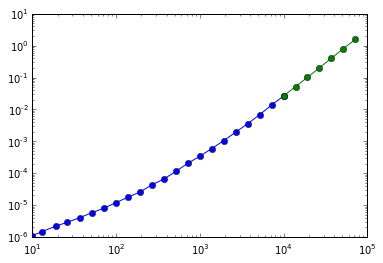

In [17]:
loglog(xs , tempos, '-o');
loglog(xs_large, tempos_large, '-og');